Unit 12: Case Study

Take a subset of the data and run the neural net presented in class:
N can be any number greater than 1 million, but less than 10.5 million (8GB Ram recommended for all the data).

data source: https://archive.ics.uci.edu/ml/machine-learning-databases/00280/

Work (10 points each)

1.	Pick 3 or more different architectures (add/subtract layers+neurons) and run the model + score. 
2.	With those same 3 architectures, run the SAME architecture but with 2 different (from sigmoid) activation functions.  Google the Keras documentation for a look at different available activations. 
3.	Take your best model from parts 1&2 and vary the batch size by at least 2 orders of magnitude
4.	Take your best model (score) from parts 1&2 and use 3 different kernel initializers. Use a reasonable batch size.
5.	Take your best results from #3 and try 3 different optimizers. (LMGTFY)
6.	Take all that you’ve learned so far and give your best shot at producing a score. 

Questions to be  answered (These are loaded questions—be warned they are there to test your understanding):

10 points - Q1: What was the effect of adding more layers/neurons.
10 points - Q2: Which parameters gave you the best result and why (in your opinion) did they work.
20 points Q3: For #6, how did you decide that your model was ‘done’


In [1]:
import numpy as np
import pandas as pd
import keras
import time, pickle

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc

from keras import backend as K
from keras import regularizers, optimizers

from keras.models import Sequential, load_model
from keras.layers import  Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.noise import GaussianNoise
from keras.utils import np_utils 
from kerutils import *
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD
from keras.callbacks import LearningRateScheduler
from keras.constraints import maxnorm

from matplotlib import pyplot as plt
from scipy.misc import imread, imresize
from PIL import Image

%matplotlib inline

Using TensorFlow backend.


In [2]:
N=10500000. ## Change this line adjust the number of rows. 
data=pd.read_csv("HIGGS.csv",nrows=N,header=None)
test_data=pd.read_csv("HIGGS.csv",nrows=500000,header=None,skiprows=10500000)

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from sklearn.metrics import roc_auc_score

In [ ]:
## 1. Pick 3 or more different architectures (add/subtract layers+neurons) and run the model + score

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                1450      
_________________________________________________________________
activation_1 (Activation)    (None, 50)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 1,501
Trainable params: 1,501
Non-trainable params: 0
___________________

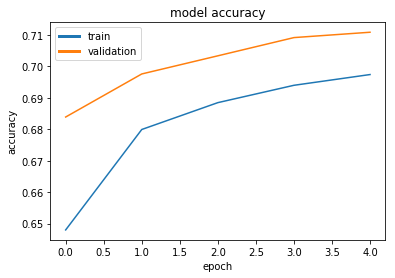

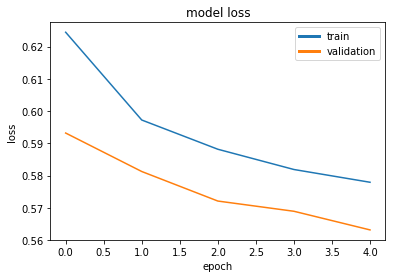

In [5]:
## 2xlayers, roc_auc_score = 0.7791760135160337
epochs = 5
batch_size = 1000

y = np.array(data.loc[:,0])
x = np.array(data.loc[:,1:])
x_test = np.array(test_data.loc[:,1:])
y_test = np.array(test_data.loc[:,0])

model_q1_2 = Sequential()
model_q1_2.add(Dense(50, input_dim=x.shape[1], kernel_initializer='uniform')) # X_train.shape[1] == 28 here
model_q1_2.add(Activation('sigmoid'))
model_q1_2.add(Dropout(0.10))

model_q1_2.add(Dense(1, kernel_initializer='uniform')) 
model_q1_2.add(Activation('sigmoid'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model_q1_2.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=sgd)
print(model_q1_2.summary())

h = model_q1_2.fit(
    x,
    y,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test),
    shuffle=True
)

## print('Saving model1 to the file "model1.h5"')
## model1.save("model1.h5")

## model_q1_2.fit(x, y, epochs=5, batch_size=1000)
## roc_auc_score(y_test,model_q1_2.predict(x_test))

show_scores(model_q1_2, h, x, y, x_test, y_test)

In [6]:
## 3xlayers, roc_auc_score = 0.7807769854026723

y = np.array(data.loc[:,0])
x = np.array(data.loc[:,1:])
x_test = np.array(test_data.loc[:,1:])
y_test = np.array(test_data.loc[:,0])

model_q1_3 = Sequential()
model_q1_3.add(Dense(50, input_dim=x.shape[1], kernel_initializer='uniform')) # X_train.shape[1] == 28 here
model_q1_3.add(Activation('sigmoid'))
model_q1_3.add(Dropout(0.10))

model_q1_3.add(Dense(50, kernel_initializer='uniform'))
model_q1_3.add(Activation('sigmoid'))
model_q1_3.add(Dropout(0.10))

model_q1_3.add(Dense(1, kernel_initializer='uniform')) 
model_q1_3.add(Activation('sigmoid'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model_q1_3.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=sgd)

model_q1_3.fit(x, y, epochs=5, batch_size=1000)
roc_auc_score(y_test,model_q1_3.predict(x_test))

Epoch 1/5
10500000/10500000 [==============================] - 42s 4us/step - loss: 0.6576 - acc: 0.5931
Epoch 2/5
10500000/10500000 [==============================] - 42s 4us/step - loss: 0.6072 - acc: 0.6669
Epoch 3/5
10500000/10500000 [==============================] - 42s 4us/step - loss: 0.5887 - acc: 0.6844
Epoch 4/5
10500000/10500000 [==============================] - 42s 4us/step - loss: 0.5787 - acc: 0.6925
Epoch 5/5
10500000/10500000 [==============================] - 42s 4us/step - loss: 0.5717 - acc: 0.6985


0.7842208438829523

In [7]:
## 5xlayers, roc_auc_score = 0.4442846595315575

y = np.array(data.loc[:,0])
x = np.array(data.loc[:,1:])
x_test = np.array(test_data.loc[:,1:])
y_test = np.array(test_data.loc[:,0])

model_q1_5 = Sequential()
model_q1_5.add(Dense(50, input_dim=x.shape[1], kernel_initializer='uniform')) # X_train.shape[1] == 28 here
model_q1_5.add(Activation('sigmoid'))
model_q1_5.add(Dropout(0.10))

model_q1_5.add(Dense(50, kernel_initializer='uniform'))
model_q1_5.add(Activation('sigmoid'))
model_q1_5.add(Dropout(0.10))

model_q1_5.add(Dense(50, kernel_initializer='uniform'))
model_q1_5.add(Activation('sigmoid'))
model_q1_5.add(Dropout(0.10))

model_q1_5.add(Dense(50, kernel_initializer='uniform'))
model_q1_5.add(Activation('sigmoid'))
model_q1_5.add(Dropout(0.10))

model_q1_5.add(Dense(1, kernel_initializer='uniform')) 
model_q1_5.add(Activation('sigmoid'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model_q1_5.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=sgd)

model_q1_5.fit(x, y, epochs=5, batch_size=1000)
roc_auc_score(y_test,model_q1_5.predict(x_test))

Epoch 1/5
10500000/10500000 [==============================] - 50s 5us/step - loss: 0.6917 - acc: 0.5294
Epoch 2/5
10500000/10500000 [==============================] - 50s 5us/step - loss: 0.6915 - acc: 0.5299
Epoch 3/5
10500000/10500000 [==============================] - 50s 5us/step - loss: 0.6914 - acc: 0.5300
Epoch 4/5
10500000/10500000 [==============================] - 50s 5us/step - loss: 0.6914 - acc: 0.5300
Epoch 5/5
10500000/10500000 [==============================] - 50s 5us/step - loss: 0.6914 - acc: 0.5300


0.5204590380710665

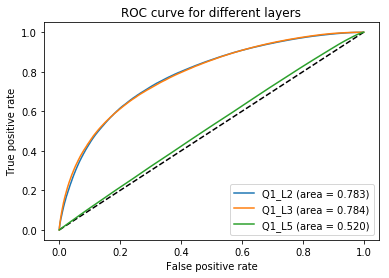

In [11]:
## from sklearn.metrics import roc_curve, auc
y_pred_q1_l2 = model_q1_2.predict(x_test).ravel()
fpr_keras_q1_l2, tpr_keras_q1_l2, thresholds_keras_q1_l2 = roc_curve(y_test, y_pred_q1_l2)
auc_keras_q1_l2 = auc(fpr_keras_q1_l2, tpr_keras_q1_l2)

y_pred_q1_l3 = model_q1_3.predict(x_test).ravel()
fpr_keras_q1_l3, tpr_keras_q1_l3, thresholds_keras_q1_l3 = roc_curve(y_test, y_pred_q1_l3)
auc_keras_q1_l3 = auc(fpr_keras_q1_l3, tpr_keras_q1_l3)

y_pred_q1_l5 = model_q1_5.predict(x_test).ravel()
fpr_keras_q1_l5, tpr_keras_q1_l5, thresholds_keras_q1_l5 = roc_curve(y_test, y_pred_q1_l5)
auc_keras_q1_l5 = auc(fpr_keras_q1_l5, tpr_keras_q1_l5)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras_q1_l2, tpr_keras_q1_l2, label='Q1_L2 (area = {:.3f})'.format(auc_keras_q1_l2))
plt.plot(fpr_keras_q1_l3, tpr_keras_q1_l3, label='Q1_L3 (area = {:.3f})'.format(auc_keras_q1_l3))
plt.plot(fpr_keras_q1_l5, tpr_keras_q1_l5, label='Q1_L5 (area = {:.3f})'.format(auc_keras_q1_l5))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for different layers')
plt.legend(loc='best')
plt.show()

In [ ]:
## 2. With those same 3 architectures, run the SAME architecture but with 2 different (from sigmoid) activation functions

In [ ]:
## http://cs231n.github.io/neural-networks-1/

In [ ]:
## 2xlayers, activation ='relu', roc_auc_score = 0.47453227907167295

y = np.array(data.loc[:,0])
x = np.array(data.loc[:,1:])
x_test = np.array(test_data.loc[:,1:])
y_test = np.array(test_data.loc[:,0])

model_q2_2 = Sequential()
model_q2_2.add(Dense(50, input_dim=x.shape[1], kernel_initializer='uniform')) # X_train.shape[1] == 28 here
model_q2_2.add(Activation('relu'))
model_q2_2.add(Dropout(0.10))

model_q2_2.add(Dense(1, kernel_initializer='uniform')) 
model_q2_2.add(Activation('relu'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model_q2_2.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=sgd)

model_q2_2.fit(x, y, epochs=5, batch_size=1000)
roc_auc_score(y_test,model_q2_2.predict(x_test))

In [ ]:
## 3xlayers, activation ='relu', roc_auc_score = 0.46561285961535454

y = np.array(data.loc[:,0])
x = np.array(data.loc[:,1:])
x_test = np.array(test_data.loc[:,1:])
y_test = np.array(test_data.loc[:,0])

model_q2_3 = Sequential()
model_q2_3.add(Dense(50, input_dim=x.shape[1], kernel_initializer='uniform')) # X_train.shape[1] == 28 here
model_q2_3.add(Activation('relu'))
model_q2_3.add(Dropout(0.10))

model_q2_3.add(Dense(50, kernel_initializer='uniform'))
model_q2_3.add(Activation('relu'))
model_q2_3.add(Dropout(0.10))

model_q2_3.add(Dense(1, kernel_initializer='uniform')) 
model_q2_3.add(Activation('relu'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model_q2_3.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=sgd)

model_q2_3.fit(x, y, epochs=5, batch_size=1000)
roc_auc_score(y_test,model_q2_3.predict(x_test))

In [ ]:
## 5xlayers, activation ='relu', roc_auc_score = 0.4642447063750198

y = np.array(data.loc[:,0])
x = np.array(data.loc[:,1:])
x_test = np.array(test_data.loc[:,1:])
y_test = np.array(test_data.loc[:,0])

model_q2_5 = Sequential()
model_q2_5.add(Dense(50, input_dim=x.shape[1], kernel_initializer='uniform')) # X_train.shape[1] == 28 here
model_q2_5.add(Activation('relu'))
model_q2_5.add(Dropout(0.10))

model_q2_5.add(Dense(50, kernel_initializer='uniform'))
model_q2_5.add(Activation('relu'))
model_q2_5.add(Dropout(0.10))

model_q2_5.add(Dense(50, kernel_initializer='uniform'))
model_q2_5.add(Activation('relu'))
model_q2_5.add(Dropout(0.10))

model_q2_5.add(Dense(50, kernel_initializer='uniform'))
model_q2_5.add(Activation('relu'))
model_q2_5.add(Dropout(0.10))

model_q2_5.add(Dense(1, kernel_initializer='uniform')) 
model_q2_5.add(Activation('relu'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model_q2_5.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=sgd)

model_q2_5.fit(x, y, epochs=5, batch_size=1000)
roc_auc_score(y_test, model_q2_5.predict(x_test))

In [ ]:
## 2xlayers, activation ='elu', roc_auc_score =  0.484558208847519

y = np.array(data.loc[:,0])
x = np.array(data.loc[:,1:])
x_test = np.array(test_data.loc[:,1:])
y_test = np.array(test_data.loc[:,0])

model_q2_2e = Sequential()
model_q2_2e.add(Dense(50, input_dim=x.shape[1], kernel_initializer='uniform')) # X_train.shape[1] == 28 here
model_q2_2e.add(Activation('elu'))
model_q2_2e.add(Dropout(0.10))

model_q2_2e.add(Dense(1, kernel_initializer='uniform')) 
model_q2_2e.add(Activation('elu'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model_q2_2e.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=sgd)

model_q2_2e.fit(x, y, epochs=5, batch_size=1000)
roc_auc_score(y_test,model_q2_2e.predict(x_test))

In [ ]:
## 3xlayers, activation ='elu', roc_auc_score = 0.4709237031307237

y = np.array(data.loc[:,0])
x = np.array(data.loc[:,1:])
x_test = np.array(test_data.loc[:,1:])
y_test = np.array(test_data.loc[:,0])

model_q2_3e = Sequential()
model_q2_3e.add(Dense(50, input_dim=x.shape[1], kernel_initializer='uniform')) # X_train.shape[1] == 28 here
model_q2_3e.add(Activation('elu'))
model_q2_3e.add(Dropout(0.10))

model_q2_3e.add(Dense(50, kernel_initializer='uniform'))
model_q2_3e.add(Activation('elu'))
model_q2_3e.add(Dropout(0.10))

model_q2_3e.add(Dense(1, kernel_initializer='uniform')) 
model_q2_3e.add(Activation('elu'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model_q2_3e.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=sgd)

model_q2_3e.fit(x, y, epochs=5, batch_size=1000)
roc_auc_score(y_test,model_q2_3e.predict(x_test))

In [ ]:
## 5xlayers, activation ='elu', roc_auc_score = 0.5

y = np.array(data.loc[:,0])
x = np.array(data.loc[:,1:])
x_test = np.array(test_data.loc[:,1:])
y_test = np.array(test_data.loc[:,0])

model_q2_5e = Sequential()
model_q2_5e.add(Dense(50, input_dim=x.shape[1], kernel_initializer='uniform')) # X_train.shape[1] == 28 here
model_q2_5e.add(Activation('elu'))
model_q2_5e.add(Dropout(0.10))

model_q2_5e.add(Dense(50, kernel_initializer='uniform'))
model_q2_5e.add(Activation('elu'))
model_q2_5e.add(Dropout(0.10))

model_q2_5e.add(Dense(50, kernel_initializer='uniform'))
model_q2_5e.add(Activation('elu'))
model_q2_5e.add(Dropout(0.10))

model_q2_5e.add(Dense(50, kernel_initializer='uniform'))
model_q2_5e.add(Activation('elu'))
model_q2_5e.add(Dropout(0.10))

model_q2_5e.add(Dense(1, kernel_initializer='uniform')) 
model_q2_5e.add(Activation('elu'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model_q2_5e.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=sgd)

model_q2_5e.fit(x, y, epochs=5, batch_size=1000)
roc_auc_score(y_test, model_q2_5e.predict(x_test))

In [ ]:
## 3. Take your best model from parts 1&2 and vary the batch size by at least 2 orders of magnitude

In [ ]:
## 3xlayers, batch_size=1000, roc_auc_score = 0.7788914810564554

y = np.array(data.loc[:,0])
x = np.array(data.loc[:,1:])
x_test = np.array(test_data.loc[:,1:])
y_test = np.array(test_data.loc[:,0])

model_q3_1k = Sequential()
model_q3_1k.add(Dense(50, input_dim=x.shape[1], kernel_initializer='uniform')) # X_train.shape[1] == 28 here
model_q3_1k.add(Activation('sigmoid'))
model_q3_1k.add(Dropout(0.10))

model_q3_1k.add(Dense(50, kernel_initializer='uniform'))
model_q3_1k.add(Activation('sigmoid'))
model_q3_1k.add(Dropout(0.10))

model_q3_1k.add(Dense(1, kernel_initializer='uniform')) 
model_q3_1k.add(Activation('sigmoid'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model_q3_1k.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=sgd)

model_q3_1k.fit(x, y, epochs=5, batch_size=1000)
roc_auc_score(y_test,model_q3_1k.predict(x_test))

In [ ]:
## 3xlayers, batch_size=100000, roc_auc_score: 0.5006365070937373

y = np.array(data.loc[:,0])
x = np.array(data.loc[:,1:])
x_test = np.array(test_data.loc[:,1:])
y_test = np.array(test_data.loc[:,0])

model_q3_100k = Sequential()
model_q3_100k.add(Dense(50, input_dim=x.shape[1], kernel_initializer='uniform')) # X_train.shape[1] == 28 here
model_q3_100k.add(Activation('sigmoid'))
model_q3_100k.add(Dropout(0.10))

model_q3_100k.add(Dense(50, kernel_initializer='uniform'))
model_q3_100k.add(Activation('sigmoid'))
model_q3_100k.add(Dropout(0.10))

model_q3_100k.add(Dense(1, kernel_initializer='uniform')) 
model_q3_100k.add(Activation('sigmoid'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model_q3_1k.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=sgd)

model_q3_1k.fit(x, y, epochs=5, batch_size=100000)
roc_auc_score(y_test,model_q3_100k.predict(x_test))

In [ ]:
## 3xlayers, batch_size=10, roc_auc_score: 0.7807750274417308 (the best)

y = np.array(data.loc[:,0])
x = np.array(data.loc[:,1:])
x_test = np.array(test_data.loc[:,1:])
y_test = np.array(test_data.loc[:,0])

model_q3_10 = Sequential()
model_q3_10.add(Dense(50, input_dim=x.shape[1], kernel_initializer='uniform')) # X_train.shape[1] == 28 here
model_q3_10.add(Activation('sigmoid'))
model_q3_10.add(Dropout(0.10))

model_q3_10.add(Dense(50, kernel_initializer='uniform'))
model_q3_10.add(Activation('sigmoid'))
model_q3_10.add(Dropout(0.10))

model_q3_10.add(Dense(1, kernel_initializer='uniform')) 
model_q3_10.add(Activation('sigmoid'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model_q3_10.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=sgd)

model_q3_10.fit(x, y, epochs=5, batch_size=10)
roc_auc_score(y_test,model_q3_10.predict(x_test))

In [ ]:
## 4. Take your best model (score) from parts 1&2 and use 3 different kernel initializers. Use a reasonable batch size.

In [ ]:
## 4 kernel_initializer='uniform', roc_auc_score: 0.7807750274417308

y = np.array(data.loc[:,0])
x = np.array(data.loc[:,1:])
x_test = np.array(test_data.loc[:,1:])
y_test = np.array(test_data.loc[:,0])

model_q4_u = Sequential()
model_q4_u.add(Dense(50, input_dim=x.shape[1], kernel_initializer='uniform')) # X_train.shape[1] == 28 here
model_q4_u.add(Activation('sigmoid'))
model_q4_u.add(Dropout(0.10))

model_q4_u.add(Dense(50, kernel_initializer='uniform'))
model_q4_u.add(Activation('sigmoid'))
model_q4_u.add(Dropout(0.10))

model_q4_u.add(Dense(1, kernel_initializer='uniform')) 
model_q4_u.add(Activation('sigmoid'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model_q4_u.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=sgd)

model_q4_u.fit(x, y, epochs=5, batch_size=1000)
roc_auc_score(y_test,model_q4_u.predict(x_test))

In [ ]:
## 4 kernel_initializer='random_uniform', roc_auc_score: 0.7808735534914519

y = np.array(data.loc[:,0])
x = np.array(data.loc[:,1:])
x_test = np.array(test_data.loc[:,1:])
y_test = np.array(test_data.loc[:,0])

model_q4_ru = Sequential()
model_q4_ru.add(Dense(50, input_dim=x.shape[1], kernel_initializer='random_uniform')) # X_train.shape[1] == 28 here
model_q4_ru.add(Activation('sigmoid'))
model_q4_ru.add(Dropout(0.10))

model_q4_ru.add(Dense(50, kernel_initializer='random_uniform'))
model_q4_ru.add(Activation('sigmoid'))
model_q4_ru.add(Dropout(0.10))

model_q4_ru.add(Dense(1, kernel_initializer='random_uniform')) 
model_q4_ru.add(Activation('sigmoid'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model_q4_ru.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=sgd)

model_q4_ru.fit(x, y, epochs=5, batch_size=1000)
roc_auc_score(y_test,model_q4_ru.predict(x_test))

In [ ]:
## 4 kernel_initializer='normal' roc_auc_score: 0.7820724352084556

y = np.array(data.loc[:,0])
x = np.array(data.loc[:,1:])
x_test = np.array(test_data.loc[:,1:])
y_test = np.array(test_data.loc[:,0])

model_q4_n = Sequential()
model_q4_n.add(Dense(50, input_dim=x.shape[1], kernel_initializer='normal')) # X_train.shape[1] == 28 here
model_q4_n.add(Activation('sigmoid'))
model_q4_n.add(Dropout(0.10))

model_q4_n.add(Dense(50, kernel_initializer='normal'))
model_q4_n.add(Activation('sigmoid'))
model_q4_n.add(Dropout(0.10))

model_q4_n.add(Dense(1, kernel_initializer='normal')) 
model_q4_n.add(Activation('sigmoid'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model_q4_n.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=sgd)

model_q4_n.fit(x, y, epochs=5, batch_size=1000)
roc_auc_score(y_test,model_q4_n.predict(x_test))

In [ ]:
## 5. Take your best results from #3 and try 3 different optimizers. (LMGTFY)

In [ ]:
## 5 optimizer=sgd, roc_auc_score: 0.7811275278944515

y = np.array(data.loc[:,0])
x = np.array(data.loc[:,1:])
x_test = np.array(test_data.loc[:,1:])
y_test = np.array(test_data.loc[:,0])

model_q5_sgd = Sequential()
model_q5_sgd.add(Dense(50, input_dim=x.shape[1], kernel_initializer='uniform')) # X_train.shape[1] == 28 here
model_q5_sgd.add(Activation('sigmoid'))
model_q5_sgd.add(Dropout(0.10))

model_q5_sgd.add(Dense(50, kernel_initializer='uniform'))
model_q5_sgd.add(Activation('sigmoid'))
model_q5_sgd.add(Dropout(0.10))

model_q5_sgd.add(Dense(1, kernel_initializer='uniform')) 
model_q5_sgd.add(Activation('sigmoid'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model_q5_sgd.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=sgd)

model_q5_sgd.fit(x, y, epochs=5, batch_size=1000)
roc_auc_score(y_test,model_q5_sgd.predict(x_test))

In [ ]:
## 5 optimizer=Adamax, roc_auc_score: 0.8227544567440018

from keras.optimizers import Adamax

y = np.array(data.loc[:,0])
x = np.array(data.loc[:,1:])
x_test = np.array(test_data.loc[:,1:])
y_test = np.array(test_data.loc[:,0])

model_q5_adam = Sequential()
model_q5_adam.add(Dense(50, input_dim=x.shape[1], kernel_initializer='uniform')) # X_train.shape[1] == 28 here
model_q5_adam.add(Activation('sigmoid'))
model_q5_adam.add(Dropout(0.10))

model_q5_adam.add(Dense(50, kernel_initializer='uniform'))
model_q5_adam.add(Activation('sigmoid'))
model_q5_adam.add(Dropout(0.10))

model_q5_adam.add(Dense(1, kernel_initializer='uniform')) 
model_q5_adam.add(Activation('sigmoid'))

adam = Adamax(lr=0.1, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-6)
model_q5_adam.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=adam)

model_q5_adam.fit(x, y, epochs=5, batch_size=1000)
roc_auc_score(y_test,model_q5_adam.predict(x_test))

In [ ]:
## 5 optimizer=Nadam, roc_auc_score: 0.7801730074105127

from keras.optimizers import Nadam

y = np.array(data.loc[:,0])
x = np.array(data.loc[:,1:])
x_test = np.array(test_data.loc[:,1:])
y_test = np.array(test_data.loc[:,0])

model_q5_nag = Sequential()
model_q5_nag.add(Dense(50, input_dim=x.shape[1], kernel_initializer='uniform')) # X_train.shape[1] == 28 here
model_q5_nag.add(Activation('sigmoid'))
model_q5_nag.add(Dropout(0.10))

model_q5_nag.add(Dense(50, kernel_initializer='uniform'))
model_q5_nag.add(Activation('sigmoid'))
model_q5_nag.add(Dropout(0.10))

model_q5_nag.add(Dense(1, kernel_initializer='uniform')) 
model_q5_nag.add(Activation('sigmoid'))

nadam = Nadam(lr=0.1, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=1e-6)

model_q5_nag.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=nadam)

model_q5_nag.fit(x, y, epochs=5, batch_size=1000)
roc_auc_score(y_test,model_q5_nag.predict(x_test))

In [ ]:
## 6. Take all that you’ve learned so far and give your best shot at producing a score. 

In [ ]:
## 3xlayers, kernel_initializer='random_uniform, activation= 'sigmoid', optimizer= Adamax, batch_size=10
##  roc_auc_score: 0.7875221799347585

# from keras.optimizers import Adamax

y = np.array(data.loc[:,0])
x = np.array(data.loc[:,1:])
x_test = np.array(test_data.loc[:,1:])
y_test = np.array(test_data.loc[:,0])

model_q5_adam = Sequential()
model_q5_adam.add(Dense(50, input_dim=x.shape[1], kernel_initializer='random_uniform')) # X_train.shape[1] == 28 here
model_q5_adam.add(Activation('sigmoid'))
model_q5_adam.add(Dropout(0.10))

model_q5_adam.add(Dense(50, kernel_initializer='random_uniform'))
model_q5_adam.add(Activation('sigmoid'))
model_q5_adam.add(Dropout(0.10))

model_q5_adam.add(Dense(1, kernel_initializer='random_uniform')) 
model_q5_adam.add(Activation('sigmoid'))

adam = Adamax(lr=0.1, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-6)
model_q5_adam.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=adam)

model_q5_adam.fit(x, y, epochs=5, batch_size=10)
roc_auc_score(y_test,model_q5_adam.predict(x_test))

In [ ]:
## 3xlayers, kernel_initializer='random_uniform, activation= 'sigmoid', optimizer= Adamax, batch_size=500
## roc_auc_score: 0.8174560479875594

## from keras.optimizers import Adamax

y = np.array(data.loc[:,0])
x = np.array(data.loc[:,1:])
x_test = np.array(test_data.loc[:,1:])
y_test = np.array(test_data.loc[:,0])

model_q5_adam = Sequential()
model_q5_adam.add(Dense(50, input_dim=x.shape[1], kernel_initializer='random_uniform')) # X_train.shape[1] == 28 here
model_q5_adam.add(Activation('sigmoid'))
model_q5_adam.add(Dropout(0.10))

model_q5_adam.add(Dense(50, kernel_initializer='random_uniform'))
model_q5_adam.add(Activation('sigmoid'))
model_q5_adam.add(Dropout(0.10))

model_q5_adam.add(Dense(1, kernel_initializer='random_uniform')) 
model_q5_adam.add(Activation('sigmoid'))

adam = Adamax(lr=0.1, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-6)
model_q5_adam.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=adam)

model_q5_adam.fit(x, y, epochs=5, batch_size=500)
roc_auc_score(y_test,model_q5_adam.predict(x_test))

In [ ]:
## 3xlayers, kernel_initializer='random_uniform, activation= 'sigmoid', optimizer= Adamax, batch_size=1000
## roc_auc_score: 0.8235113259509186

## from keras.optimizers import Adamax

y = np.array(data.loc[:,0])
x = np.array(data.loc[:,1:])
x_test = np.array(test_data.loc[:,1:])
y_test = np.array(test_data.loc[:,0])

model_q5_adam = Sequential()
model_q5_adam.add(Dense(50, input_dim=x.shape[1], kernel_initializer='uniform')) # X_train.shape[1] == 28 here
model_q5_adam.add(Activation('sigmoid'))
model_q5_adam.add(Dropout(0.10))

model_q5_adam.add(Dense(50, kernel_initializer='uniform'))
model_q5_adam.add(Activation('sigmoid'))
model_q5_adam.add(Dropout(0.10))

model_q5_adam.add(Dense(1, kernel_initializer='uniform')) 
model_q5_adam.add(Activation('sigmoid'))

adam = Adamax(lr=0.1, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-6)
model_q5_adam.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=adam)

model_q5_adam.fit(x, y, epochs=5, batch_size=1000)
roc_auc_score(y_test,model_q5_adam.predict(x_test))

In [ ]:
## 3xlayers, kernel_initializer='random_uniform, activation= 'sigmoid', optimizer= Adamax, batch_size=10000
## roc_auc_score:0.8213663083670677

## from keras.optimizers import Adamax

y = np.array(data.loc[:,0])
x = np.array(data.loc[:,1:])
x_test = np.array(test_data.loc[:,1:])
y_test = np.array(test_data.loc[:,0])

model_q5_adam = Sequential()
model_q5_adam.add(Dense(50, input_dim=x.shape[1], kernel_initializer='uniform')) # X_train.shape[1] == 28 here
model_q5_adam.add(Activation('sigmoid'))
model_q5_adam.add(Dropout(0.10))

model_q5_adam.add(Dense(50, kernel_initializer='uniform'))
model_q5_adam.add(Activation('sigmoid'))
model_q5_adam.add(Dropout(0.10))

model_q5_adam.add(Dense(1, kernel_initializer='uniform')) 
model_q5_adam.add(Activation('sigmoid'))

adam = Adamax(lr=0.1, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-6)
model_q5_adam.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=adam)

model_q5_adam.fit(x, y, epochs=5, batch_size=1000)
roc_auc_score(y_test,model_q5_adam.predict(x_test))

In [ ]:
## Questions to be answered (These are loaded questions—be warned they are there to test your understanding):
## Q1: What was the effect of adding more layers/neurons. 10 points 

In [ ]:
## final 3 layers

from keras.optimizers import Adamax

epochs = 15
batch_size = 1000

y = np.array(data.loc[:,0])
x = np.array(data.loc[:,1:])
x_test = np.array(test_data.loc[:,1:])
y_test = np.array(test_data.loc[:,0])

model_q7 = Sequential()
model_q7.add(Dense(50, input_dim=x.shape[1], kernel_initializer='uniform')) # X_train.shape[1] == 28 here
model_q7.add(Activation('sigmoid'))
model_q7.add(Dropout(0.10))

model_q7.add(Dense(50, kernel_initializer='uniform'))
model_q7.add(Activation('sigmoid'))
model_q7.add(Dropout(0.10))

model_q7.add(Dense(1, kernel_initializer='uniform')) 
model_q7.add(Activation('sigmoid'))

adam = Adamax(lr=0.1, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-6)
model_q7.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=adam)


h = model_q7.fit(
    x,
    y,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test),
    shuffle=True
)

show_scores(model_q7, h, x, y, x_test, y_test)

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
# model_q7.fit(x, y, epochs=10, batch_size=1000)
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, model_q7.predict(x_test))

In [ ]:
## final 5 layers

from keras.optimizers import Adamax

epochs = 15
batch_size = 1000

y = np.array(data.loc[:,0])
x = np.array(data.loc[:,1:])
x_test = np.array(test_data.loc[:,1:])
y_test = np.array(test_data.loc[:,0])

model_q8 = Sequential()
model_q8.add(Dense(50, input_dim=x.shape[1], kernel_initializer='uniform')) # X_train.shape[1] == 28 here
model_q8.add(Activation('sigmoid'))
model_q8.add(Dropout(0.10))

model_q8.add(Dense(50, kernel_initializer='uniform'))
model_q8.add(Activation('sigmoid'))
model_q8.add(Dropout(0.10))

model_q8.add(Dense(50, kernel_initializer='uniform'))
model_q8.add(Activation('sigmoid'))
model_q8.add(Dropout(0.10))

model_q8.add(Dense(50, kernel_initializer='uniform'))
model_q8.add(Activation('sigmoid'))
model_q8.add(Dropout(0.10))

model_q8.add(Dense(1, kernel_initializer='uniform')) 
model_q8.add(Activation('sigmoid'))

adam = Adamax(lr=0.1, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-6)
model_q8.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=adam)


h = model_q8.fit(
    x,
    y,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test),
    shuffle=True
)

print('Saving model_q8 to the file "model8.h5"')
model_q8.save("model_q8.h5")

show_scores(model_q8, h, x, y, x_test, y_test)

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, model_q8.predict(x_test))

In [ ]:
## Q2: Which parameters gave you the best result and why (in your opinion) did they work. 10 points

In [ ]:
## https://hackernoon.com/simple-guide-on-how-to-generate-roc-plot-for-keras-classifier-2ecc6c73115a

In [3]:
y = np.array(data.loc[:,0])
x = np.array(data.loc[:,1:])
x_test = np.array(test_data.loc[:,1:])
y_test = np.array(test_data.loc[:,0])

from keras.optimizers import Adamax

def build_model8():
    model_q8 = Sequential()
    model_q8.add(Dense(50, input_dim=x.shape[1], kernel_initializer='uniform'))
    model_q8.add(Activation('sigmoid'))
    model_q8.add(Dropout(0.10))   
    
    model_q8.add(Dense(1, kernel_initializer='uniform')) 
    model_q8.add(Activation('sigmoid'))
    
    adam = Adamax(lr=0.1, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-6)
    model_q8.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=adam)
    return model_q8


from keras.wrappers.scikit_learn import KerasClassifier
keras_model1 = build_model8()
keras_model1.fit(x, y, epochs=5, batch_size=1000, verbose=1)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
10500000/10500000 [==============================] - 42s 4us/step - loss: 0.5974 - acc: 0.6762
Epoch 2/5
10500000/10500000 [==============================] - 38s 4us/step - loss: 0.5685 - acc: 0.7024
Epoch 3/5
10500000/10500000 [==============================] - 38s 4us/step - loss: 0.5596 - acc: 0.7095
Epoch 4/5
10500000/10500000 [==============================] - 38s 4us/step - loss: 0.5566 - acc: 0.7116
Epoch 5/5
10500000/10500000 [==============================] - 38s 4us/step - loss: 0.5550 - acc: 0.7131


In [4]:
## y = np.array(data.loc[:,0])
## x = np.array(data.loc[:,1:])
## x_test = np.array(test_data.loc[:,1:])
## y_test = np.array(test_data.loc[:,0])

## from keras.optimizers import Adamax

def build_model9():
    model_q9 = Sequential()
    model_q9.add(Dense(50, input_dim=x.shape[1], kernel_initializer='uniform'))
    model_q9.add(Activation('sigmoid'))
    model_q9.add(Dropout(0.10))
    
    model_q9.add(Dense(50, kernel_initializer='uniform'))
    model_q9.add(Activation('sigmoid'))
    model_q9.add(Dropout(0.10))
    
    model_q9.add(Dense(1, kernel_initializer='uniform')) 
    model_q9.add(Activation('sigmoid'))
    
    adam = Adamax(lr=0.1, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-6)
    model_q9.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=adam)
    return model_q9


from keras.wrappers.scikit_learn import KerasClassifier
keras_model = build_model9()
keras_model.fit(x, y, epochs=5, batch_size=1000, verbose=1)


Epoch 1/5
10500000/10500000 [==============================] - 41s 4us/step - loss: 0.5774 - acc: 0.6915
Epoch 2/5
10500000/10500000 [==============================] - 41s 4us/step - loss: 0.5445 - acc: 0.7201
Epoch 3/5
10500000/10500000 [==============================] - 43s 4us/step - loss: 0.5387 - acc: 0.7240
Epoch 4/5
10500000/10500000 [==============================] - 43s 4us/step - loss: 0.5354 - acc: 0.7263
Epoch 5/5
10500000/10500000 [==============================] - 43s 4us/step - loss: 0.5335 - acc: 0.7275


In [5]:
# y = np.array(data.loc[:,0])
# x = np.array(data.loc[:,1:])
# x_test = np.array(test_data.loc[:,1:])
# y_test = np.array(test_data.loc[:,0])

def build_model10():
    model_q10 = Sequential()
    model_q10.add(Dense(50, input_dim=x.shape[1], kernel_initializer='uniform')) 
    model_q10.add(Dropout(0.10))
    
    model_q10.add(Dense(50, kernel_initializer='uniform'))
    model_q10.add(Activation('sigmoid'))
    model_q10.add(Dropout(0.10))
    
    model_q10.add(Dense(50, kernel_initializer='uniform'))
    model_q10.add(Activation('sigmoid'))
    model_q10.add(Dropout(0.10))
    
    model_q10.add(Dense(50, kernel_initializer='uniform'))
    model_q10.add(Activation('sigmoid'))
    model_q10.add(Dropout(0.10))
    
    model_q10.add(Dense(1, kernel_initializer='uniform')) 
    model_q10.add(Activation('sigmoid'))
    
    adam = Adamax(lr=0.1, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-6)
    model_q10.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=adam)    
    return model_q10

keras_model2 = build_model10()
keras_model2.fit(x, y, epochs=5, batch_size=1000, verbose=1)

Epoch 1/5
10500000/10500000 [==============================] - 51s 5us/step - loss: 0.6917 - acc: 0.5293
Epoch 2/5
10500000/10500000 [==============================] - 50s 5us/step - loss: 0.6915 - acc: 0.5299
Epoch 3/5
10500000/10500000 [==============================] - 50s 5us/step - loss: 0.6915 - acc: 0.5299
Epoch 4/5
10500000/10500000 [==============================] - 50s 5us/step - loss: 0.6915 - acc: 0.5299
Epoch 5/5
10500000/10500000 [==============================] - 51s 5us/step - loss: 0.6915 - acc: 0.5300


In [7]:
from sklearn.metrics import roc_curve
y_pred_keras = keras_model.predict(x_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

y_pred_keras1 = keras_model1.predict(x_test).ravel()
fpr_keras1, tpr_keras1, thresholds_keras1 = roc_curve(y_test, y_pred_keras1)

y_pred_keras2 = keras_model2.predict(x_test).ravel()
fpr_keras2, tpr_keras2, thresholds_keras2 = roc_curve(y_test, y_pred_keras2)

In [8]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
auc_keras1 = auc(fpr_keras1, tpr_keras1)
auc_keras2 = auc(fpr_keras2, tpr_keras2)

In [9]:
from matplotlib import pyplot as plt

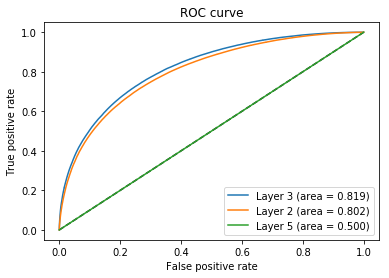

In [10]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Layer 3 (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_keras1, tpr_keras1, label='Layer 2 (area = {:.3f})'.format(auc_keras1))
plt.plot(fpr_keras2, tpr_keras2, label='Layer 5 (area = {:.3f})'.format(auc_keras2))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:

## Q3: For #6, how did you decide that your model was ‘done’? 20 points

Train on 10500000 samples, validate on 500000 samples
Epoch 1/5
10500000/10500000 [==============================] - 45s 4us/step - loss: 0.6113 - acc: 0.6430 - val_loss: 0.5414 - val_acc: 0.7233
Epoch 2/5
10500000/10500000 [==============================] - 44s 4us/step - loss: 0.5437 - acc: 0.7210 - val_loss: 0.5247 - val_acc: 0.7338
Epoch 3/5
10500000/10500000 [==============================] - 45s 4us/step - loss: 0.5361 - acc: 0.7260 - val_loss: 0.5190 - val_acc: 0.7375
Epoch 4/5
10500000/10500000 [==============================] - 44s 4us/step - loss: 0.5327 - acc: 0.7282 - val_loss: 0.5164 - val_acc: 0.7389
Epoch 5/5
10500000/10500000 [==============================] - 45s 4us/step - loss: 0.5309 - acc: 0.7294 - val_loss: 0.5164 - val_acc: 0.7388
Saving model_11_adam to the file "model_11_adam.h5"
Training: accuracy   = 0.739263 loss = 0.516467
Validation: accuracy = 0.738810 loss = 0.516370
Over fitting score   = 0.010540
Under fitting score  = 0.024939
Params count: 4051
stop 

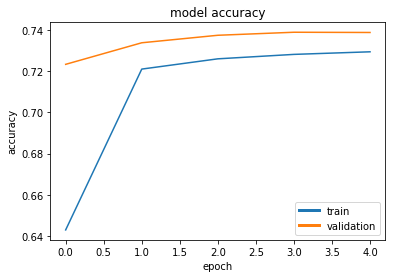

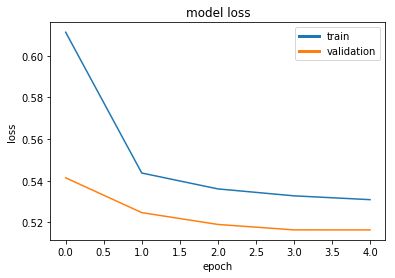

In [13]:
## 2xlayers, roc_auc_score = 0.7791760135160337

epochs = 5
batch_size = 1000

y = np.array(data.loc[:,0])
x = np.array(data.loc[:,1:])
x_test = np.array(test_data.loc[:,1:])
y_test = np.array(test_data.loc[:,0])

model_11_adam = Sequential()
model_11_adam.add(Dense(50, input_dim=x.shape[1], kernel_initializer='uniform')) # X_train.shape[1] == 28 here
model_11_adam.add(Activation('sigmoid'))
model_11_adam.add(Dropout(0.10))

model_11_adam.add(Dense(50, kernel_initializer='uniform'))
model_11_adam.add(Activation('sigmoid'))
model_11_adam.add(Dropout(0.10))

model_11_adam.add(Dense(1, kernel_initializer='uniform')) 
model_11_adam.add(Activation('sigmoid'))

adam = Adamax(lr=0.1, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-6)
model_11_adam.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=adam)

h = model_11_adam.fit(
    x,
    y,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test),
    shuffle=True
)

print('Saving model_11_adam to the file "model_11_adam.h5"')
model_11_adam.save("model_11_adam.h5")

## model_q1_2.fit(x, y, epochs=5, batch_size=1000)
## roc_auc_score(y_test,model_q1_2.predict(x_test))

show_scores(model_11_adam, h, x, y, x_test, y_test)

In [14]:
roc_auc_score(y_test, model_11_adam.predict(x_test))

0.8208147448755715